## TPL1  Grupo D

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo.
Para nuestro grupo los requisitos del filtro son:

<img src="img/param_filtro.png">

Las instrucciones pormenorizadas de lo que deberán realizar las encontrarán en el Anexo.

El primer paso es diseñar el filtro:

  ### Prototipo Pasabanda  

| f1 | fc | f2 |  Q  |
|:--:|:--:|:--:|:---:|
| 0,6 KHz | 6 KHz | 60 KHz | 3 |

| ⍺máx [dB] | ⍺mín1 [dB] | ⍺mín2 [dB] | Wo | Ws1 | Ws2 |
|:----------------:|:-----------------:|:-----------------:|:-------:|:----------:|:----------:|
|      2,5      |       15    |       15        |    1    |  0,1  |  10  | 

$ \Omega_{s1} = Q \cdot \frac{W_{s1}^2 - 1}{W_{s1}} = -29,7 $  
$ \Omega_{s2} = Q \cdot \frac{W_{s2}^2 - 1}{W_{s2}} =  29,7 $  

### Prototipo Pasabajos
| ⍺máx [dB] | ⍺mín [dB] | W0  | Ws  |
| --------- | --------- | ------- | ------- |
| 2,5 | 15 | 1 | 29,7 |

### Diseño de Chebyshev
$ \epsilon^2 = 10^{\frac{\alpha_{max}}{10}} - 1 = 10^{\frac{2,5}{10}} - 1 = 0,77827941 $  
$ \alpha_{min} = 15 dB <= 10 log(1 + \epsilon^2 \cdot cosh{(n \cdot cosh(W_s)^{-1})}^2) $  
N = 1 -> 33 dB

In [2]:
import math as m

alpha_max = 2.5    # dB
alpha_min = 15   # dB
w_s_lp = 29.7

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh((m.sqrt(m.pow(10, alpha_min * 0.1) - 1)) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

alpha = 10 * m.log(1 + epsilon**2 * m.cosh(N * m.acosh(w_s_lp))**2)

print(f'epsilon: {epsilon}, N: {N} , Alpha: {alpha}')

epsilon: 0.8822014566066657, N: 1 , Alpha: 65.33079989086727


### Calculo de Chebyshev

$ C_0 = 1 $  
$ C_1 = W $  

$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot (W)^2} $  
$ |T(s)|^2_{W = \frac{s}{j}} = \frac{1}{1 - \epsilon^2 \cdot s^2 } $  
$ |T(s)|^2 = T(s) \cdot T(-s) = \frac{1}{1 + \epsilon \cdot s} \cdot \frac{1}{1 - \epsilon \cdot s} $   


### Transformación pasabanda

$ p = Q \cdot \frac{s^2 + 1}{s} $  
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{1}{\epsilon \cdot (Q \cdot \frac{s^2 + 1}{s}) + 1} $    
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{s}{\epsilon \cdot Q \cdot (s^2 + 1) + s} $    
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{\frac{s}{\epsilon \cdot Q}}{s^2 + \frac{s}{\epsilon \cdot Q} + 1} $  
$ T(s) = \frac{\frac{s}{2,6466}}{s^2 + \frac{s}{2,6466} + 1} $  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

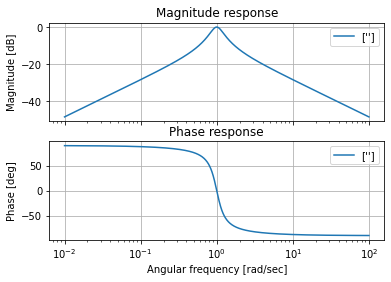

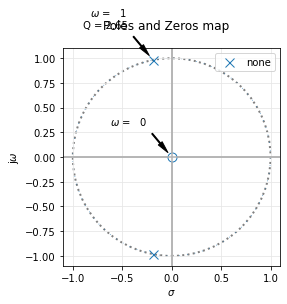

In [4]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Transferencia

W0 = 1
Q  = 2.6466
K  = 1

numerador   = [K * W0/Q, 0] 
denominador = [1 , W0/Q , W0**2]

my_tf = TransferFunction(numerador, denominador)

bodePlot(my_tf,1)

pzmap(my_tf,2)

In [5]:
from IPython.display import IFrame

print("Diseño del variables de estado")

IFrame("pdf/uaf42.pdf", width=1000, height=500)

Diseño del variables de estado


### Calculo de los componentes

<img src="img/param_diseño.png" width=600>

Varios de los componentes son internos al micro y sus valores ya estan definidos.

$ A_{BP} = 1 $  $ R_4 = R_G = 50k $  

Podemos entrar por el pin 2

$ W_n^2 = (6 KHz \cdot 2 \pi)^2 = \frac{R_2}{R_1 R_{F1} R_{F2} C_1 C_2} $  
$ 1,421223 x10^9 = \frac{1}{R_{F1} R_{F2} C_1 C_2} $  
$ 1,421223 x10^{-9} = \frac{1}{R_{F1} R_{F2}} $  

$ Q=\frac{1 +\frac{R_4 (R_G + R_Q)}{R_G R_Q}}{1 + \frac{R_2}{R_1}}\cdot(\frac{R_2 R_{F1} C_1}{R_1 R_{F2} C_2})^{\frac{1}{2}}$  
$ 2,6466 = \frac{1 + \frac{R_G + R_Q}{R_Q}}{1 + 1} \cdot (\frac{R_F1}{R_F2})^{\frac{1}{2}} $  
$ 2,6466 = \frac{1 + \frac{R_G + R_Q}{R_Q}}{2} \cdot (\frac{R_F1}{R_F2})^{\frac{1}{2}} $  
$ 5,2932 = (2 + \frac{R_G}{R_Q}) \cdot (\frac{R_F1}{R_F2})^{\frac{1}{2}} $  

Si utilizamos:
$ R_{F1} = 33 K\Omega $

$ R_{F2} = 22 K\Omega $

$ R_Q = 22 K\Omega $  

$ f_c = 5906,793949 Hz $  

$ Q = 5,233 $  

El Q pedido en el enunciado no lo podemos cumplir.

## Circuito

<img src="img/circuitoTPL1.PNG" width= 800px>


<img src="img/simulacionTPL1.PNG" width= 800px>


# Armado del circuito

Para este trabajo se diseño un circuito impreso utilizando KiCad.
Usamos el filtro UAF42 que es un filtro activo que puede ser configurado para obtener un filtro pasa-bajos, pasa-banda o pasa-alto.

<img src="img/esquematico.png">
<img src="img/circuito.jpeg" width=600>

### La segunda parte del trabajo es testear todo en el laboratorio.

Se uso un generador de funciones para introducir una señal senoidal a la entrada del filtro ([TFG-3205E](https://www.atsdhaka.com/files/201809/1536690674_FunctionGenerator-TFG-3205E.pdf)).
Para alimentar al UAF42 se usaron dos fuentes de alimentacion ([HY3005D](https://static.rapidonline.com/pdf/554308_v1.pdf?utm_source=AffWin&utm_medium=Affiliate&awc=1799_1656605572_215141de5da33515ac558c2dffe1cc42)) que entregaron +9V y -9V al integrado.
Para medir obtener los datos de la transferencia, es decir la ganancia y la fase, se uso un osciloscopio ([GDS-1102A](https://www.tme.com/Document/82b584d032c1a158936eabaa6677334e/GDS-1000A-U.pdf)).

<img src="img/equipo_medicion.jpeg" width=600>


Para realizar las mediciones en el laboratorio se fueron generando señales senoidales de 1 Vpp. Las frecuencias fueron elegidas de modo que quedaran equiespaciadas en el diagrama de Bode.
En el osciloscopio se puso en el Canal 1 la señal de entrada y en el Canal 2 la señal de salida, de modo que podiamos ver ambas señales juntas.
Utilizando las funciones del osciloscopio podiamos ver la ganancia de la señal de salida y la diferencia de tiempo que habia entre un pico de la señal de entrada y un pico de la señal de salida. Con este ultimo dato se puede calcular la fase y el retardo de grupo.

In [4]:
from IPython.display import display, FileLink

print("En total se realizaron 35 mediciones.")
local_file = FileLink('datos/Datos_DSO.xlsx', result_html_prefix="Click aca para descargar: ")
display(local_file)

En total se realizaron 35 mediciones.


D:\Documentos\TC2\TC2\TPS\TPL1\datos\Datos_DSO.xlsx

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import derivative
import circuitos as circ
import numpy as np
from matplotlib import cm
import math
import pandas as pd

#VARIABLES GLOBALES

W0 = 6000*2*math.pi
Q  = 2.6466
K  = 1

W0_teoric  = W0
Q_teoric = Q
K_teoric  = K

popt_teoric = [W0_teoric, Q_teoric, K_teoric]

# Condiciones de ajuste
# w0_min <= W0 <= w0_max
# q_min  <= Q  <= q_max 
# k_min <= K <= k_max:

w0_min = W0/1000
w0_max = W0*1000
q_min = Q /10
q_max = Q *10
k_min = K /1000
k_max = K *1000
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max]) #Para la función de ajuste

In [10]:
# Datos DSO
df_DSO = pd.read_excel('datos/Datos_DSO.xlsx', index_col=0) 

df_DSO = df_DSO.dropna()

w_dso = df_DSO['Frecuencias Angulares'].to_numpy()

ganancia_dso = df_DSO['Ganancia'].to_numpy()

angulo_dso = df_DSO['Δ Ángulo'].to_numpy()

# Datos Analizador de Frecuencia

df_Analizador_Frec = pd.read_excel('datos/Datos_Analizador.xlsx', index_col=0)

w_analizador_ganancia = df_Analizador_Frec['Frecuencia(Ganancia)'].dropna().to_numpy()

ganancia_analizador = df_Analizador_Frec['Ganancia'].dropna().to_numpy()

w_analizador_fase = df_Analizador_Frec['Frecuencia(Fase)'].dropna().to_numpy()

angulo_analizador = df_Analizador_Frec['Fase(radianes)'].dropna().to_numpy()

### Gráfico de Módulo

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

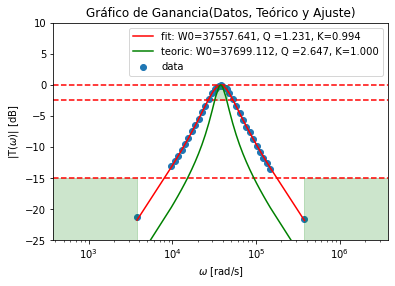

La grafica verde es la teorica

Desvío estandar de los ajustes

σ(W0)    39.911584
σ(Q)      0.004329
σ(K)      0.001539
dtype: float64


In [21]:
# Ajuste de los puntos en módulo
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt, pcov = curve_fit(circ.trans_pb_mod, w_dso, ganancia_dso,bounds=bounds)

# Gráfico Ganancia

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Gráfico Plantilla

ws=[0.6E3*2*math.pi,60E3*2*math.pi]
wc=[5.08E3*2*math.pi,7.08E3*2*math.pi]
a_c = 2.5
a_s = 15
a_b = 0
circ.dibujar_plantilla_bp(ax,wc,ws,a_c,a_s,a_b);

# Grafico los datos en db

ax.scatter(w_dso, 20*np.log10(ganancia_dso), label='data')

# Gráfico del ajuste

plt.plot(w_dso, 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_dso),w_dso, popt)), 'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt))

# Gráfico teórico
plt.plot(w_dso, 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_dso),w_dso, popt_teoric)),
         'g-', label='teoric: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_teoric))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('|T($\omega$)| [dB]')
plt.legend()
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Ganancia(Datos, Teórico y Ajuste)")

plt.show()

# Datos del desvío standard del ajuste
perr_Ganancia = np.sqrt(np.diag(pcov)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Ganancia, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("La grafica verde es la teorica\n")
print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Fase

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

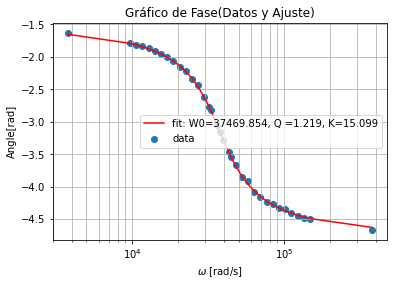

Desvío estandar de los ajustes

σ(W0)    8.120619e+01
σ(Q)     9.830507e-03
σ(K)     1.693422e+07
dtype: float64


In [12]:
# Ajuste de los puntos en fase
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt_angle, pcov_angle = curve_fit(circ.trans_pb_arg, w_dso, angulo_dso, bounds = bounds)

# Gráfico fase

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(w_dso, angulo_dso, label='data')

# Gráfico del ajuste

plt.plot(w_dso, circ.arg_trans_pb(np.zeros_like(w_dso),w_dso, popt_angle), 'r-', label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_angle))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Angle[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Fase(Datos y Ajuste)")
plt.legend()

plt.show()

# Datos del desvío standard del ajuste

perr_Fase = np.sqrt(np.diag(pcov_angle)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Fase, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Retardo de grupo

- Este gráfico se realizó con los datos del ajuste en fase.
- Se utiliza la función derivate del módulo scipy.

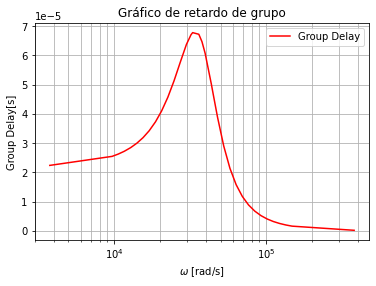

In [13]:
# Retardo de Grupo

group_delay_fit = -derivative(circ.trans_pb_arg,w_dso,args=popt_angle)

# Gráfico Retardo de grupo

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

plt.plot(w_dso, group_delay_fit, color='red', label='Group Delay')

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Group Delay[s]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de retardo de grupo")
plt.legend()

plt.show()

# Analizador de frecuencia:

Utlizindo un analizador de frecuencia de alta precision se hizo un barrido de frecuencias (100 muestras) y se midio tanto modulo y fase.

### Gráfico de Módulo

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

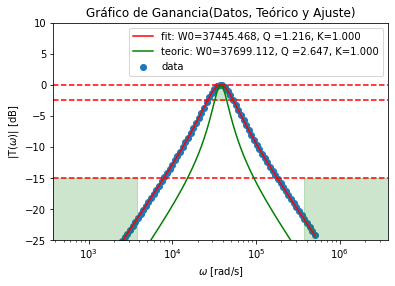

Desvío estandar de los ajustes

σ(W0)    2.385851
σ(Q)     0.000252
σ(K)     0.000107
dtype: float64


In [20]:
# Ajuste de los puntos en módulo
bounds = ([w0_min, q_min, k_min],[w0_max, q_max/5, k_max])

popt_2, pcov_2 = curve_fit(circ.trans_pb_mod
                           , w_analizador_ganancia
                           , ganancia_analizador
                           ,bounds=bounds)

# Gráfico Ganancia

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Gráfico Plantilla

ws=[0.6E3*2*math.pi,60E3*2*math.pi]
wc=[5.08E3*2*math.pi,7.08E3*2*math.pi]
a_c = 2.5
a_s = 15
a_b = 0
circ.dibujar_plantilla_bp(ax,wc,ws,a_c,a_s,a_b);

# Grafico los datos en db

ax.scatter(w_analizador_ganancia, 20*np.log10(ganancia_analizador), label='data')

# Gráfico del ajuste

aux_gain = 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_analizador_ganancia),w_analizador_ganancia, popt_2))
plt.plot(w_analizador_ganancia,
         aux_gain, 
         'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_2))

# Gráfico teórico

popt_teoric = [W0_teoric, Q_teoric, K_teoric]

ganancia_teórica = 20*np.log10(circ.trans_pb_mod(w_analizador_ganancia,
          popt_teoric[0],popt_teoric[1],popt_teoric[2]))
plt.plot(w_analizador_ganancia, ganancia_teórica,
         'g-', label='teoric: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_teoric))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('|T($\omega$)| [dB]')
plt.legend()
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Ganancia(Datos, Teórico y Ajuste)")

plt.show()

# Datos del desvío standard del ajuste
perr_Ganancia = np.sqrt(np.diag(pcov_2)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Ganancia, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Fase

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

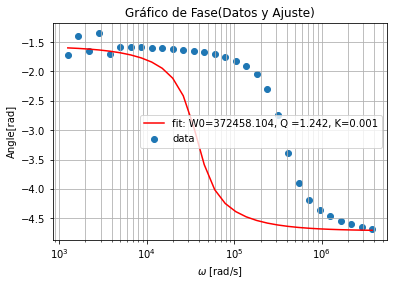

Desvío estandar de los ajustes

σ(W0)    6972.904396
σ(Q)        0.073654
σ(K)        0.000000
dtype: float64


In [22]:
# Ajuste de los puntos en fase
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt_3, pcov_3 = curve_fit(circ.trans_pb_arg, w_analizador_fase, angulo_analizador, bounds = bounds)

# Gráfico fase

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(w_analizador_fase, angulo_analizador, label='data')

# Gráfico del ajuste

plt.plot(w_analizador_fase,
         circ.arg_trans_pb(np.zeros_like(w_analizador_fase),
                           w_analizador_fase, popt_angle),
         'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_3))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Angle[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Fase(Datos y Ajuste)")
plt.legend()

plt.show()

# Datos del desvío standard del ajuste

perr_Fase = np.sqrt(np.diag(pcov_3)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Fase, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Retardo de grupo

- Este gráfico se realizó con los datos del ajuste en fase.
- Se utiliza la función derivate del módulo scipy.

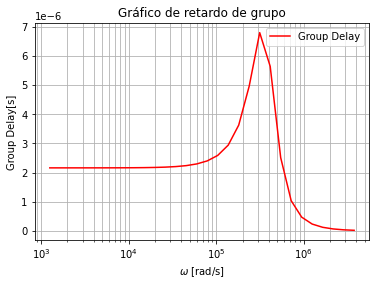

In [17]:
# Retardo de Grupo

group_delay_fit = -derivative(circ.trans_pb_arg,w_analizador_fase,args=popt_3)

# Gráfico Retardo de grupo

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

plt.plot(w_analizador_fase, group_delay_fit, color='red', label='Group Delay')

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Group Delay[s]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de retardo de grupo")
plt.legend()

plt.show()

# Extra Didáctico

- Gráfico del plano S en 3D. Donde el eje Z representa la ganancia en decibelios.
- Además se puede observar una linea negra, la cual es un indicio de lo que podemos obtener en la respuesta en módulo, solo que el eje y no está logaritmado.

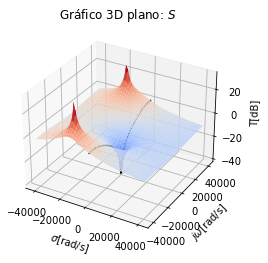

In [18]:

# Gráfico 3D polos y ceros

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
Y = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
X, Y = np.meshgrid(X,Y)

ax.plot_surface(X, Y, 20*np.log10(circ.mod_trans_pb(X,Y,popt)), cmap=cm.coolwarm, linewidth=0, antialiased=True)

Y = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
X = np.zeros_like(Y)
ax.plot3D(X,Y,20*np.log10(circ.mod_trans_pb(X,Y,popt)), 'black')

# Configuraciones del plot

ax.set_title("Gráfico 3D plano: $S$")
ax.set_xlabel('$\sigma$[rad/s]')
ax.set_ylabel('$j\omega$[rad/s]')
ax.set_zlabel('T[dB]')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
    
plt.show()